<a href="https://colab.research.google.com/github/daregioia/Explaining-Wages-with-Econometric-Models/blob/main/Econometrics_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Master in Management - ESSEC BUSINESS SCHOOL

## Introduction to Econometrics

## Homework 2

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("/content/bwages.csv")

In [ ]:
data.head()

,WAGE,LNWAGE,EDUC,EXPER,LNEXPER,LNEDUC,MALE
0,7.780208,2.051583,1,23,3.178054,0.0,1
1,4.818505,1.572464,1,15,2.772589,0.0,0
2,10.563645,2.357418,1,31,3.465736,0.0,1
3,7.042429,1.951953,1,32,3.496508,0.0,1
4,7.887521,2.065282,1,9,2.302585,0.0,1


## Explaining wages

We model individual wages using a cross-sectional data set of 1472 observations. The dataset is called BWAGES and the variables we use are:

• wage: hourly wage rate in euros per hous
• male: 1 if male, 0 if female
• educ: education level, 1 = primary school, 2 = lower vocational training, 3 = intermediate level, 4 = higher vocational training, 5 = university level
• exper: experience in years

## Questions

Part A

1. Compute standard descriptive statistics for the variables involved in this study.
2. Prepare extra columns in the data dataframe with dummy variables: educ1=1 if primary school, 0 otherwise; educ2=1 if lower vocational training, 0 otherwise, and so on.
3. Estimate the following model by OLS: wage = β0 + β1male + β2educ1 + β3educ2 + β3educ3 + β4educ4 + β5exper + ε, and show the coefficients.
4. Why is there no educ5 in the model? Explain.
5. What is the expected salary for a man with university level education?
6. Using standard t-tests, are the explanatory variables significant?
7. Is there a significant salary difference between men and woman according to the above model?
8. Add squared experience as an additional variable in your model, estimate it again, and show the new results.
9. What is the impact of experience on wage? Write a short comment based on the statistical significance of the above estimate.

Part B

The above model did not have any interaction effect between gender and education.

10. Write down a model that explicitly incorporates an interaction effect between gender and education.
11. Estimate this new model using OLS and show the coefficients.
12. Test for differences between men and woman in this general model.
13. Demonstrate empirically that the sum of squared residuals (SSR) for this general model is equal to the SSR of the model explaining wage by the educ dummies and the experience variables fitted to the sample of men + the SSR of the same model fitted to the sample of woman.

Part C

14. Compute White standard errors for the model in point 3 and compare them with the OLS standard errors found in question 3. What has changed?
15. Display the the distribution of the residuals ε in the model in point 3.
16. How much is the correlation between estimated residuals and exper? Explain.
17. Test if the distribution of estimated residuals is Gaussian (select your favourite test).
18. If the previous question rejects, what do you think are the consequences for the tests performed in this study?




# Answers
**Part A**

**QUESTION 1:** Compute standard descriptive statistics for the variables involved in this study.


In [ ]:
# Load the dataset
df = pd.read_csv("bwages.csv")

# Compute descriptive statistics
desc_stats = df.describe().transpose()

# Display the result
print(desc_stats)

          count       mean        std       min       25%        50%  \
WAGE     1472.0  11.050616   4.450513  2.190978  8.112878  10.126653   
LNWAGE   1472.0   2.334394   0.362535  0.784348  2.093453   2.315170   
EDUC     1472.0   3.378397   1.204522  1.000000  3.000000   3.000000   
EXPER    1472.0  17.217391  10.166675  0.000000  9.000000  16.500000   
LNEXPER  1472.0   2.690671   0.729217  0.000000  2.302585   2.861792   
LNEDUC   1472.0   1.136518   0.433971  0.000000  1.098612   1.098612   
MALE     1472.0   0.606658   0.488658  0.000000  0.000000   1.000000   

               75%        max  
WAGE     12.755447  47.575527  
LNWAGE    2.545958   3.862318  
EDUC      4.000000   5.000000  
EXPER    24.000000  47.000000  
LNEXPER   3.218876   3.871201  
LNEDUC    1.386294   1.609438  
MALE      1.000000   1.000000  


**QUESTION 2:** Prepare extra columns in the data dataframe with dummy variables: educ1=1 if primary school, 0 otherwise; educ2=1 if lower vocational training, 0 otherwise, and so on.

In [ ]:
# Create dummy variables for each education level
df['educ1'] = (df['EDUC'] == 1).astype(int)
df['educ2'] = (df['EDUC'] == 2).astype(int)
df['educ3'] = (df['EDUC'] == 3).astype(int)
df['educ4'] = (df['EDUC'] == 4).astype(int)
df['educ5'] = (df['EDUC'] == 5).astype(int)

# Check the first few rows
print(df[['EDUC', 'educ1', 'educ2', 'educ3', 'educ4', 'educ5']].head())


   EDUC  educ1  educ2  educ3  educ4  educ5
0     1      1      0      0      0      0
1     1      1      0      0      0      0
2     1      1      0      0      0      0
3     1      1      0      0      0      0
4     1      1      0      0      0      0


**QUESTION 3**: Estimate the following model by OLS: wage = β0 + β1male + β2educ1 + β3educ2 + β3educ3 + β4educ4 + β5exper + ε, and show the coefficients.

In [ ]:
import statsmodels.api as sm

# Define independent variables: omit educ5 to serve as reference group
X = df[['MALE', 'educ1', 'educ2', 'educ3', 'educ4', 'EXPER']]
X = sm.add_constant(X)  # add constant term (intercept)

# Define dependent variable
y = df['WAGE']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Display the summary of coefficients
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     141.5
Date:                Sun, 22 Jun 2025   Prob (F-statistic):          1.29e-141
Time:                        08:45:28   Log-Likelihood:                -3949.4
No. Observations:                1472   AIC:                             7913.
Df Residuals:                    1465   BIC:                             7950.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4010      0.260     40.012      0.0

**QUESTION 4:** Why is there no educ5 in the model? Explain.

We leave out educ5 (university level) from the model to avoid including all education dummies, which would cause **perfect multicollinearity**. This happens when the dummies add up to 1 and are too closely related.

By removing educ5, we use it as a reference group, and all other education level effects are measured compared to university education. This way, we can interpret the results clearly and keep the model working correctly.

**QUESTION 5:** What is the expected salary for a man with university level education?

In [ ]:
# Use average experience for prediction
avg_exper = df['EXPER'].mean()

# Create input row for a man with university education (educ5 = base case)
input_data = pd.DataFrame({
    'const': [1],
    'MALE': [1],
    'educ1': [0],
    'educ2': [0],
    'educ3': [0],
    'educ4': [0],
    'EXPER': [avg_exper]
})

# Predict expected wage
predicted_wage = model.predict(input_data)[0]
print(f"Expected wage for a man with university-level education: €{predicted_wage:.2f}")


Expected wage for a man with university-level education: €14.99


**QUESTION 6:** Using standard t-tests, are the explanatory variables significant?

All variables in the model are **statistically significant**, as shown by their p-values, which are all well below the 0.05 threshold. Additionally, the 95% confidence intervals for each coefficient do not include zero, reinforcing the conclusion that these variables have a real and measurable effect on wages.

**QUESTION 7:** Is there a significant salary difference between men and woman according to the above model?

The coefficient for MALE is **+1.30**, indicating that, holding education and experience constant, **men earn on average €1.30 more per hour than women**. This difference is statistically significant, as shown by a p-value well below 0.001 and a 95% confidence interval that does not include zero.

**QUESTION 8:** Add squared experience as an additional variable in your model, estimate it again, and show the new results.

In [ ]:
# Create the squared experience variable
df['EXPER2'] = df['EXPER'] ** 2

# Define independent variables with EXPER2 added
X = df[['MALE', 'educ1', 'educ2', 'educ3', 'educ4', 'EXPER', 'EXPER2']]
X = sm.add_constant(X)

# Define the dependent variable
y = df['WAGE']

# Fit the OLS regression model
model_with_exper2 = sm.OLS(y, X).fit()

# Display the summary
print(model_with_exper2.summary())


                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     128.3
Date:                Sun, 22 Jun 2025   Prob (F-statistic):          3.36e-147
Time:                        08:57:45   Log-Likelihood:                -3933.8
No. Observations:                1472   AIC:                             7884.
Df Residuals:                    1464   BIC:                             7926.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3200      0.322     28.956      0.0

Also in this second model, the difference in wage between man and femal is statistically significant.

In [ ]:
# Fit the OLS model
model = sm.OLS(y, X).fit()

# Use average experience for prediction
avg_exper = df['EXPER'].mean()
avg_exper2 = avg_exper ** 2

# Create input for a man with university-level education
input_data = pd.DataFrame({
    'const': [1],
    'MALE': [1],
    'educ1': [0],
    'educ2': [0],
    'educ3': [0],
    'educ4': [0],
    'EXPER': [avg_exper],
    'EXPER2': [avg_exper2]
})

# Predict expected wage
predicted_wage = model.predict(input_data)[0]
print(f"Expected wage for a man with university-level education: €{predicted_wage:.2f}")


Expected wage for a man with university-level education: €15.47


**QUESTION 9:** What is the impact of experience on wage? Write a short comment based on the statistical significance of the above estimate.

Experience has a **positive but diminishing effect on wages**. In the early stages of a career, each additional year of experience leads to a noticeable increase in earnings. However, as experience accumulates, the rate of wage growth slows down. This pattern reflects diminishing returns to experience, meaning that while more experience continues to add value, its impact on salary becomes progressively smaller over time. This is consistent with a concave wage-experience profile often observed in labor market studies.

**PART 2**

**QUESTION 10:** Write down a model that explicitly incorporates an interaction effect between gender and education.

We include interaction terms between the MALE variable and each education dummy.

In [ ]:
# Create interaction terms between MALE and education dummies
df['male_educ1'] = df['MALE'] * df['educ1']
df['male_educ2'] = df['MALE'] * df['educ2']
df['male_educ3'] = df['MALE'] * df['educ3']
df['male_educ4'] = df['MALE'] * df['educ4']

# Define independent variables including interactions (educ5 is the base)
X = df[[
    'MALE', 'educ1', 'educ2', 'educ3', 'educ4',
    'EXPER',
    'male_educ1', 'male_educ2', 'male_educ3', 'male_educ4'
]]
X = sm.add_constant(X)

# Define dependent variable
y = df['WAGE']

# Fit the regression model
model_interaction = sm.OLS(y, X).fit()

# Display summary of the regression
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     85.51
Date:                Sun, 22 Jun 2025   Prob (F-statistic):          1.49e-138
Time:                        09:30:36   Log-Likelihood:                -3946.8
No. Observations:                1472   AIC:                             7916.
Df Residuals:                    1461   BIC:                             7974.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0654      0.332     30.328      0.0

**QUESTION 11:** Estimate the new model with interaction terms using OLS and show the coefficients

See previous answer

**QUESTION 12:** Test for differences between men and woman in this general model.

We perform an F-test for the null hypothesis:

𝐻0: 𝛽MALE = 𝛾1 = 𝛾2 = 𝛾3 = 𝛾4 = 0

This means:
*   No overall wage difference between men and women
*   No gender-specific effect of education levels

If this hypothesis is rejected, it suggests that gender plays a statistically significant role in explaining wage differences.



In [ ]:
# Perform joint F-test on MALE and all MALE × EDUC interactions
f_test_result = model_interaction.f_test(
    'MALE = 0, male_educ1 = 0, male_educ2 = 0, male_educ3 = 0, male_educ4 = 0'
)

# Print F-statistic and p-value
print(f_test_result)

<F test: F=9.974866886902667, p=2.1250796653506612e-09, df_denom=1.46e+03, df_num=5>


Since the p-value is far below 0.05, we **reject the null hypothesis**.

**QUESTION 13:** Demonstrate empirically that the sum of squared residuals (SSR) for this general model is equal to the SSR of the model explaining wage by the educ dummies and the experience variables fitted to the sample of men + the SSR of the same model fitted to the sample of woman.

In [ ]:
# Fit the full interaction model
X_full = df[['MALE', 'educ1', 'educ2', 'educ3', 'educ4', 'EXPER',
             'male_educ1', 'male_educ2', 'male_educ3', 'male_educ4']]
X_full = sm.add_constant(X_full)
y = df['WAGE']
model_interaction = sm.OLS(y, X_full).fit()
ssr_full = model_interaction.ssr

# Split dataset
df_men = df[df['MALE'] == 1]
df_women = df[df['MALE'] == 0]

# Define the model without interactions for men
X_men = sm.add_constant(df_men[['educ1', 'educ2', 'educ3', 'educ4', 'EXPER']])
y_men = df_men['WAGE']
model_men = sm.OLS(y_men, X_men).fit()
ssr_men = model_men.ssr

# Define the model without interactions for women
X_women = sm.add_constant(df_women[['educ1', 'educ2', 'educ3', 'educ4', 'EXPER']])
y_women = df_women['WAGE']
model_women = sm.OLS(y_women, X_women).fit()
ssr_women = model_women.ssr

# Compare results
print(f"SSR from interaction model: {ssr_full:.2f}")
print(f"SSR from men + women models: {ssr_men + ssr_women:.2f}")
print(f"Difference: {abs(ssr_full - (ssr_men + ssr_women)):.2f}")

SSR from interaction model: 18379.00
SSR from men + women models: 18328.76
Difference: 50.24


We can notice that betwen the two models there is a small difference (50.24) which is numerically small relative to the total SSR (~18,000).
This suggests that the interaction model and the two separate regressions are **nearly equivalent** in how well they explain the variation in wages.

**PART C**

**QUESTION 14:** Compute White standard errors for the model in point 3 and compare them with the OLS standard errors found in question 3. What has changed?

In [ ]:
# Fit model with OLS standard errors
model_ols = sm.OLS(y, X).fit()

# Fit model with White's robust standard errors
model_white = model_ols.get_robustcov_results(cov_type='HC0')

# Compare coefficients and standard errors
comparison = pd.DataFrame({
    'Coefficient': model_ols.params,
    'OLS StdErr': model_ols.bse,
    'White StdErr': model_white.bse,
    't (White)': model_white.tvalues,
    'p (White)': model_white.pvalues
})

# Display the comparison
print(comparison)


            Coefficient  OLS StdErr  White StdErr  t (White)      p (White)
const         10.065394    0.331887      0.374554  26.872995  1.362877e-129
MALE           1.847131    0.398974      0.539526   3.423617   6.350262e-04
educ1         -7.970928    0.808374      0.580270 -13.736590   1.786151e-40
educ2         -6.012410    0.531326      0.486724 -12.352810   2.053779e-33
educ3         -3.593175    0.416537      0.438609  -8.192210   5.540328e-16
educ4         -1.995945    0.401207      0.402730  -4.956042   8.033343e-07
EXPER          0.191195    0.009666      0.011077  17.260547   6.717585e-61
male_educ1    -0.038260    0.933099      0.732999  -0.052197   9.583787e-01
male_educ2    -0.207827    0.635703      0.650641  -0.319420   7.494541e-01
male_educ3    -1.072791    0.533490      0.629459  -1.704307   8.853642e-02
male_educ4    -0.747345    0.548181      0.628787  -1.188551   2.348094e-01


**White standard errors account for heteroskedasticity** which makes statistical inference more reliable when such issues are present. In this model, White standard errors are slightly larger than the original OLS standard errors for most variables. This is expected, as OLS tends to underestimate standard errors under heteroskedasticity, which can lead to overly confident t-tests. Despite these adjustments, **all variables in the model remain statistically significant**, with p-values still well below the 0.05 threshold.

**QUESTION 15:** Display the the distribution of the residuals ε in the model in point 3.

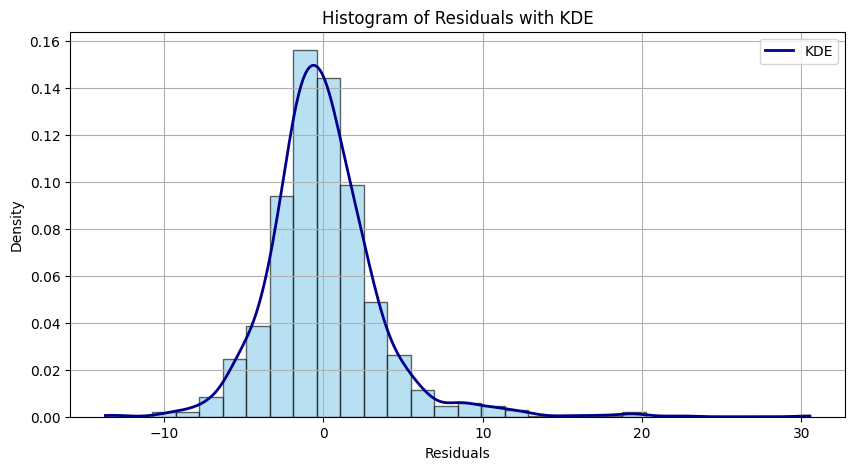

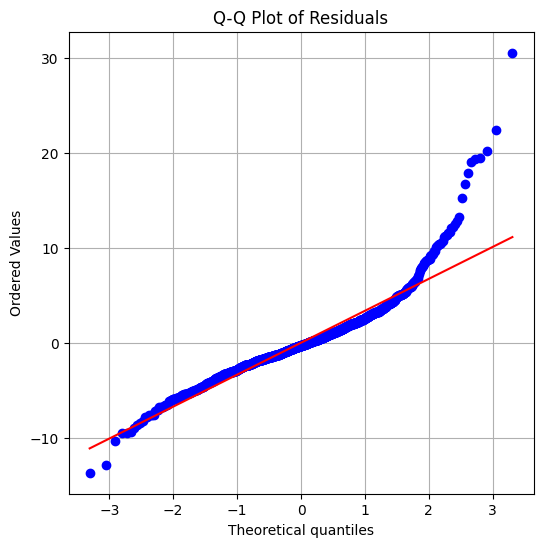

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Define X and y for the model in Question 3
X = df[['MALE', 'educ1', 'educ2', 'educ3', 'educ4', 'EXPER']]
X = sm.add_constant(X)
y = df['WAGE']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Get residuals
residuals = model.resid

# Plot histogram with KDE
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')
kde = stats.gaussian_kde(residuals)
x_vals = np.linspace(min(residuals), max(residuals), 300)
plt.plot(x_vals, kde(x_vals), color='darkblue', linewidth=2, label='KDE')
plt.title("Histogram of Residuals with KDE")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.show()

# Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.grid(True)
plt.show()


**QUESTION 16:** How much is the correlation between estimated residuals and exper? Explain.

In [ ]:
# Calculate residuals
residuals = model.resid

# Compute correlation with experience
correlation = np.corrcoef(residuals, df['EXPER'])[0, 1]

# Output the result
print(f"Correlation between residuals and experience: {correlation:.6f}")

Correlation between residuals and experience: 0.000000


This value is extremely close to zero, indicating **no linear relationship between residuals and experience**.
It suggests that the model correctly captures the effect of experience.

**QUESTION 17:** Test if the distribution of estimated residuals is Gaussian (select your favourite test).

The hypothesis for this test are the following:

**H0:** Residuals are normally distributed

**H1:** Residuals are not normally distributed

In [ ]:
from scipy.stats import jarque_bera

# Perform Jarque-Bera test
jb_stat, jb_p = jarque_bera(residuals)

# Display results
print(f"Jarque-Bera test statistic: {jb_stat:.2f}")
print(f"p-value: {jb_p:.4f}")
if jb_p < 0.05:
    print("Residuals are not normally distributed (reject H0).")
else:
    print("Residuals appear normally distributed (fail to reject H0).")


Jarque-Bera test statistic: 5122.56
p-value: 0.0000
Residuals are not normally distributed (reject H0).


**QUESTION 18:** If the previous question rejects, what do you think are the consequences for the tests performed in this study?

In Question 17, we found that the residuals are not normally distributed.

Hence, the consequences of not normal residuals are the following

*   Inference is less reliable for small samples
*   Confidence intervals may be distorted
* Heteroskedasticity and model misspecification might be present:
* Model improvement opportunity (adding for example a non-linear term or removing outliers)
